<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png"> 

# Weekend Project - Student Performance EDA - Python 
 


## Group: Power Puff Girls

### Members: Wejdan Al-Ahmadi - Sara Aldubaie
<hr style="border:2px solid gray"> </hr>

In [1]:
# Imports
import pandas as pd
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Note: We can set the style by calling Seaborn's set() method 
sns.set(rc={'figure.figsize':(20,8.27)})
palette = ['#D8A7B1','#8FDDE7','#B6E2D3', '#FAE8E0', '#EF7C8E', '#FBE5C8', '#A49393']
sns.set_palette(palette)  # set color palette


## Step 1: Exploring the data:

In [2]:
student_df = pd.read_csv('./data/student-mat.csv',sep=';')
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
student_df.shape

(395, 33)

In [4]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Step 2: Plotting the data

<Figure size 1440x595.44 with 0 Axes>

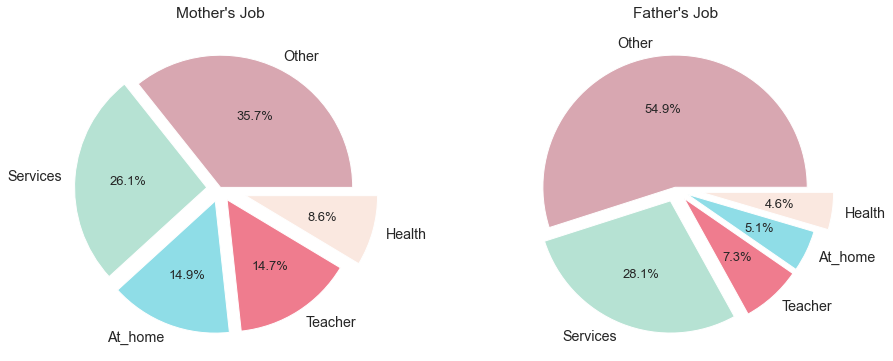

In [5]:
#---------------------------------------------------------------------------------------------------------------#
# Plotting the Mother's and Father's job types
#---------------------------------------------------------------------------------------------------------------#

plt.clf() # clear plot data 


plt.figure(figsize=(13,10))

# color dictionary to make the pie slices the same color
colours = {'other': '#D8A7B1', 'services':'#B6E2D3','health':'#FAE8E0', 'teacher':'#EF7C8E', 'at_home':'#8FDDE7' }

#---------------------------------------------------------------------------------------------------------------#
# DATA FOR PIE CHARTS: 
# 1) pie chart 1 data: Mothers job

Mjob = student_df["Mjob"].value_counts()          # slice mothers job data
Mjob_list = Mjob.index.tolist()                   # get the names for the labels from the index

Mjob_labels = [x.capitalize() for x in Mjob_list] # to set labels from index list
Mjob_values = Mjob.values                         # to set values from the dataframe

# 2) pie chart 2 data: Fathers job

Fjob = student_df["Fjob"].value_counts()          # slice mothers job data
Fjob_list = Fjob.index.tolist()                   # get the names for the labels from the index

Fjob_labels = [x.capitalize() for x in Fjob_list] # to set labels from index list
Fjob_values = Fjob.values                         # to set values from the dataframe 

#---------------------------------------------------------------------------------------------------------------#
# pie chart 1 visual settings: 


explode = (0.01,0.1,0.1,0.1,0.2)  # to make space between chart elemnts  
sns.set(font_scale = 1.30)        # font size for labels and title
plt.rcParams['font.size'] = 13    # font size for %

# Plot the data for pie chart 1

plt.subplot(2, 2, 1)              # (upper left)

plt.pie(Mjob_values, 
        labels = Mjob_labels, 
        autopct = '%1.1f%%', 
        explode = explode, 
        colors=[colours[key] for key in Mjob_list]) # loop through color dictionary and set color for labels in list

plt.title("Mother's Job")         # add title

#---------------------------------------------------------------------------------------------------------------#

# pie chart 2 visual settings: 

explode = (0.01,0.1,0.1,0.1,0.2)  # to make space between chart elemnts  
sns.set(font_scale = 1.30)        # font size for labels and title
plt.rcParams['font.size'] = 13    # font size for %

# Plot the data for pie chart 2

plt.subplot(2, 2, 2)              # (upper right)

plt.pie(Fjob_values, 
        labels = Fjob_labels, 
        autopct = '%1.1f%%', 
        explode = explode,
        colors=[colours[key] for key in Fjob_list]) # loop through color dictionary and set color for labels in list

plt.title("Father's Job")          # add title 

#---------------------------------------------------------------------------------------------------------------#

plt.tight_layout() # To increase space between plots to prevent label overlap
plt.show()         # show results



### Job Pie Chart Insights: 
* Fathers are more likely to work in the "other" category.
* Theres a higher percentage of stay at home moms than dads by 10%.
* Mothers are more likely to work in the Teaching and Health sectors compared to Fathers. 

<Figure size 1440x595.44 with 0 Axes>

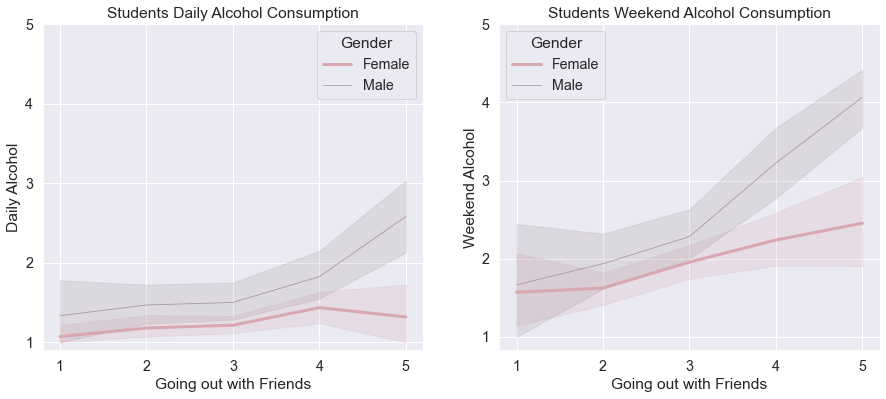

In [6]:
#---------------------------------------------------------------------------------------------------------------#
# Plotting the relationship between students going out with their friends and their daily and weekly alcohol consumption
#---------------------------------------------------------------------------------------------------------------#

plt.clf() # clear plot data 


plt.figure(figsize=(15,6))
palette2 = ['#D8A7B1', '#A49393','#8FDDE7','#B6E2D3', '#FAE8E0', '#EF7C8E', '#FBE5C8', '#A49393']
sns.set_palette(palette2)  # set color palette

#---------------------------------------------------------------------------------------------------------------#

plt.subplot(1,2,1)

line_plot_1=sns.lineplot(
    x="goout", 
    y="Dalc", 
    hue="sex",
    size="sex",
    data=student_df
)
# Naming labels, title and ticks
plt.yticks(ticks=[1,2,3,4,5]) # unify y ticks
plt.ylabel("Daily Alcohol")
plt.xlabel("Going out with Friends")
plt.title("Students Daily Alcohol Consumption");
plt.legend(title='Gender', loc='upper right', labels=["Female", "Male"])

#---------------------------------------------------------------------------------------------------------------#

plt.subplot(1,2,2)

line_plot_2=sns.lineplot(
    x="goout", 
    y="Walc", 
    hue="sex",
    size="sex",
    data=student_df
)
# Naming labels, title and ticks
plt.yticks(ticks=[1,2,3,4,5]) # unify y ticks
plt.ylabel("Weekend Alcohol")
plt.xlabel("Going out with Friends")
plt.title("Students Weekend Alcohol Consumption");
plt.legend(title='Gender', loc='upper left', labels=["Female", "Male"])


#---------------------------------------------------------------------------------------------------------------#

plt.show()

### Students Alcohol Consumption line chart insights: 
* Students are more likely to consume more alcohol during the weekend.  
* The number of females that drink is higher than males, but when the males drink they drink more (quantity) than females. 
* The more the students go out with friends the more likely they are to drink, we can see this as a positive linear progression in the second chart. 

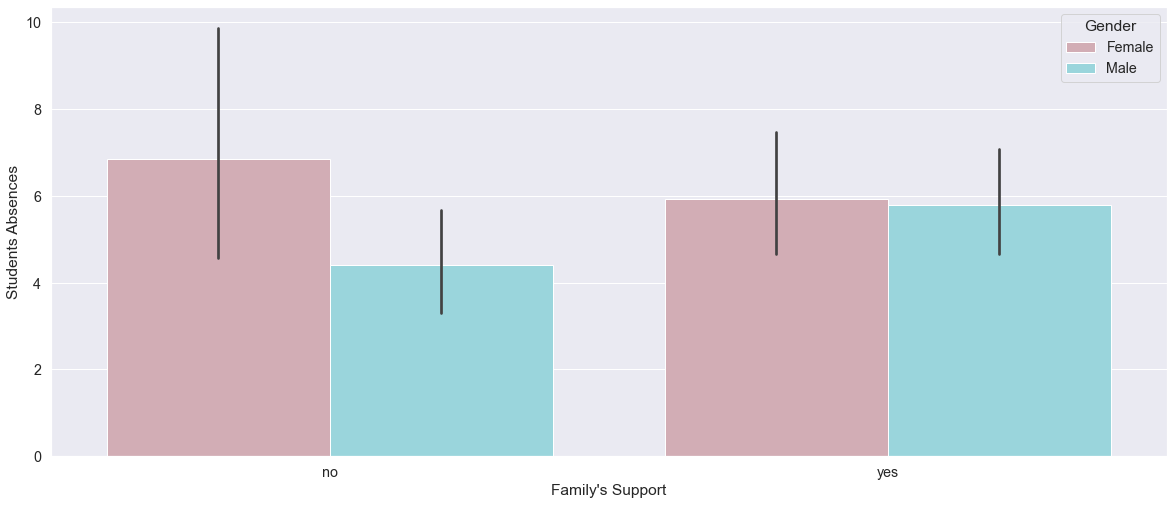

In [7]:
#---------------------------------------------------------------------------------------------------------------#
# Plotting the relationship between students family support and their absences
#---------------------------------------------------------------------------------------------------------------#

sns.set_palette(palette)  # set color palette
#---------------------------------------------------------------------------------------------------------------#
b1=sns.barplot(x="famsup", 
            y="absences",
            hue='sex',
            data=student_df)
# Setting label names and legend
plt.xlabel("Family's Support")
plt.ylabel("Students Absences")
# change legend while preserving colors
h, l = b1.get_legend_handles_labels()
b1.legend(h, ["Female", "Male"], title="Gender")
#---------------------------------------------------------------------------------------------------------------#

### Students Family Support and their Absences Barplot insights: 
* Females who lack their families support tend to be absent more. 
* Males who lack family support tend to have better attendance than their peers who have family support. 
* The attendance for students of both genders tend to be the same with the families support. 


Text(0.5, 1.0, "Family Status Effects On Student's Grades")

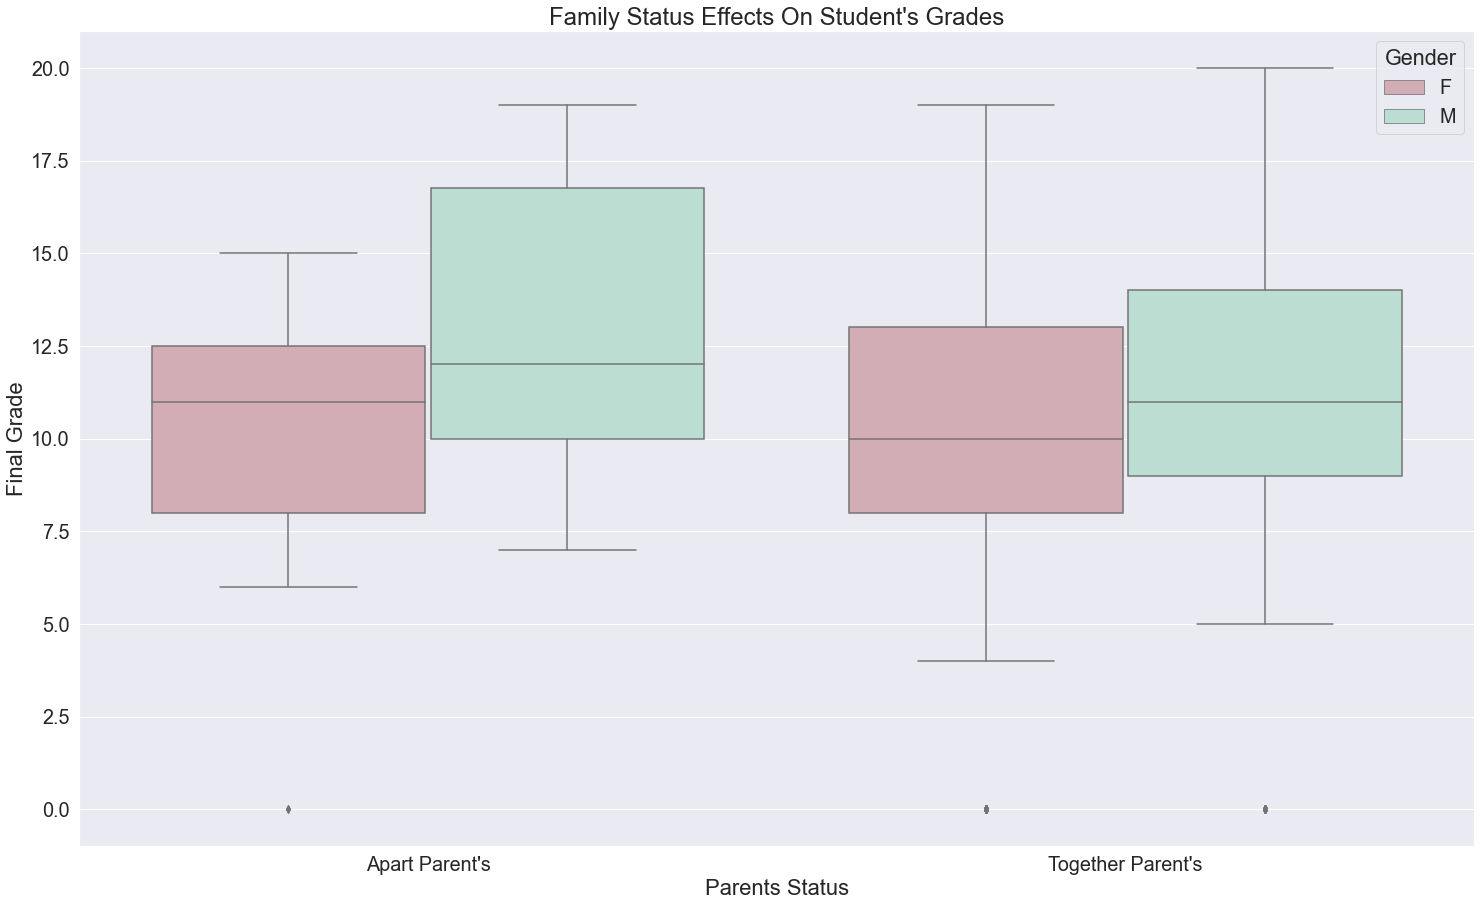

In [8]:
############## plot code #########

#group by family status effects on student's grades (if the parents are separated or not) (box) 

plt.figure(figsize=(25,15)) # figure size 
sns.set_theme(style="darkgrid") # set a theme 
sns.set(font_scale = 1.80) # font size 
palette = ['#D8A7B1','#B6E2D3', '#FAE8E0', '#EF7C8E', '#8FDDE7', '#FBE5C8', '#A49393']
sns.set_palette(palette)  # set color palette
# Box-plot code 
b1 = sns.boxplot(
    x="Pstatus",      # Parent Status
    y="G3",           # final grade
    hue="sex",        # gender 
    data=student_df   # data
)
# Naming x-ticks 
ticks = ["Apart Parent's", "Together Parent's"]
b1.set_xticklabels(ticks)

# Naming labels, legend and title 
plt.legend(title='Gender', loc='upper right')
plt.ylabel('Final Grade', fontsize=22) 
plt.xlabel('Parents Status', fontsize=22) 
plt.title("Family Status Effects On Student's Grades",  fontsize=24)


### Based on the above plot we can understand the following: ###

- Males minimum grade is higher than females for overall in math course.
- The apart parents have a more negative impact on females than males.
- The maximum grade was in students with parents who lives together.
- Males tend to have higher grades than females. 

In [9]:
# making a subset of the data based on number of failures

# failed only once
failures_1 = student_df.loc[student_df['failures' ] == 1]
failures_1["failures"].value_counts()

# failed only twise
failures_2 = student_df.loc[student_df['failures' ] == 2]
failures_2["failures"].value_counts()

# failed more than three times
failures_3 = student_df.loc[student_df['failures' ] == 3]
failures_3["failures"].value_counts()


3    16
Name: failures, dtype: int64

Text(0.5, 1.0, 'Failed More Than Three Times')

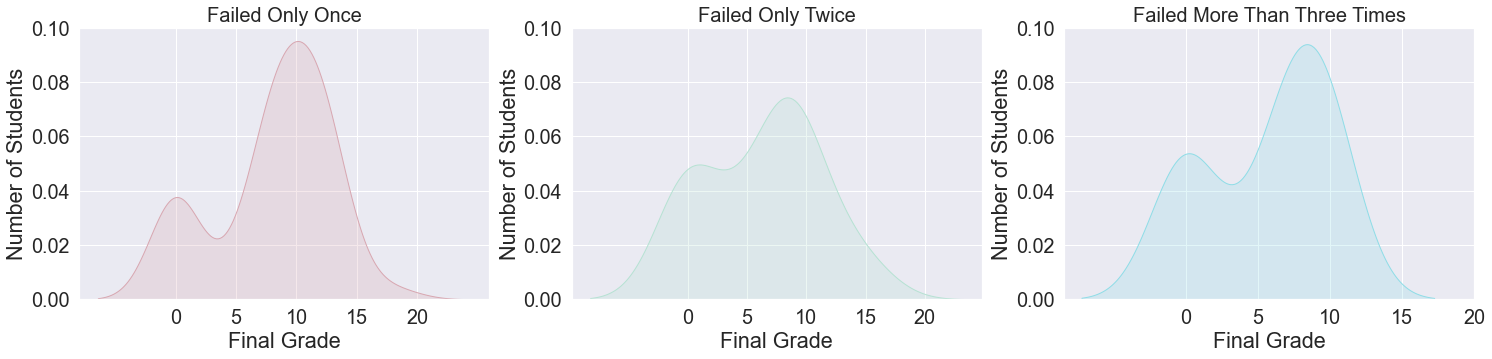

In [10]:
# Making a subplot 
fig, axes = plt.subplots(figsize=(25,5), ncols=3, nrows=1) # sub plot with 1 row and 3 columns 

# first plot (failed only once)
ax0= sns.kdeplot(failures_1['G3'],
                 shade=True,         
                 color ='#D8A7B1', 
                 ax=axes[0])
# set x-ticks and y-ticks 
ax0.set_xticks([0,5,10,15,20])
ax0.set_yticks(ticks=[0.00,0.02,0.04,0.06,0.08,0.10])
# Naming labels and title 
ax0.set_xlabel('Final Grade')
ax0.set_ylabel('Number of Students')
ax0.set_title('Failed Only Once', fontsize= 20)


# second plot  (failed only twice)
ax1=sns.kdeplot(failures_2['G3'], 
                shade=True, 
                color ='#B6E2D3', 
                ax=axes[1])
# set x-ticks and y-ticks 
ax1.set_xticks([0,5,10,15,20])
ax1.set_yticks(ticks=[0.00,0.02,0.04,0.06,0.08,0.10])
# Naming labels and title 
ax1.set_xlabel('Final Grade')
ax1.set_ylabel('Number of Students')
ax1.set_title('Failed Only Twice', fontsize= 20)


# third plot (failed more than three times)
ax2=sns.kdeplot(failures_3['G3'], 
                shade=True, 
                color ='#8FDDE7', 
                ax=axes[2])
# set x-ticks and y-ticks 
ax2.set_xticks([0,5,10,15,20])
ax2.set_yticks(ticks=[0.00,0.02,0.04,0.06,0.08,0.10])
# Naming labels and title 
ax2.set_xlabel('Final Grade' )
ax2.set_ylabel('Number of Students')
ax2.set_title('Failed More Than Three Times', fontsize= 20)

### Based on the above plot we can understand the following: ###

- Most of the students that only failed once got a score of 10 on the final grade. 
- Most of the students that failed twice got a score between 0 and 8 on the final grade.
- Most of the students that failed more than three times got a score between 0 and 7 on the final grade. 
- Students who only failed once have an overall better performance than those who failed more than twice. 
- There is a dip that starts from 1 until 3 in all charts. 

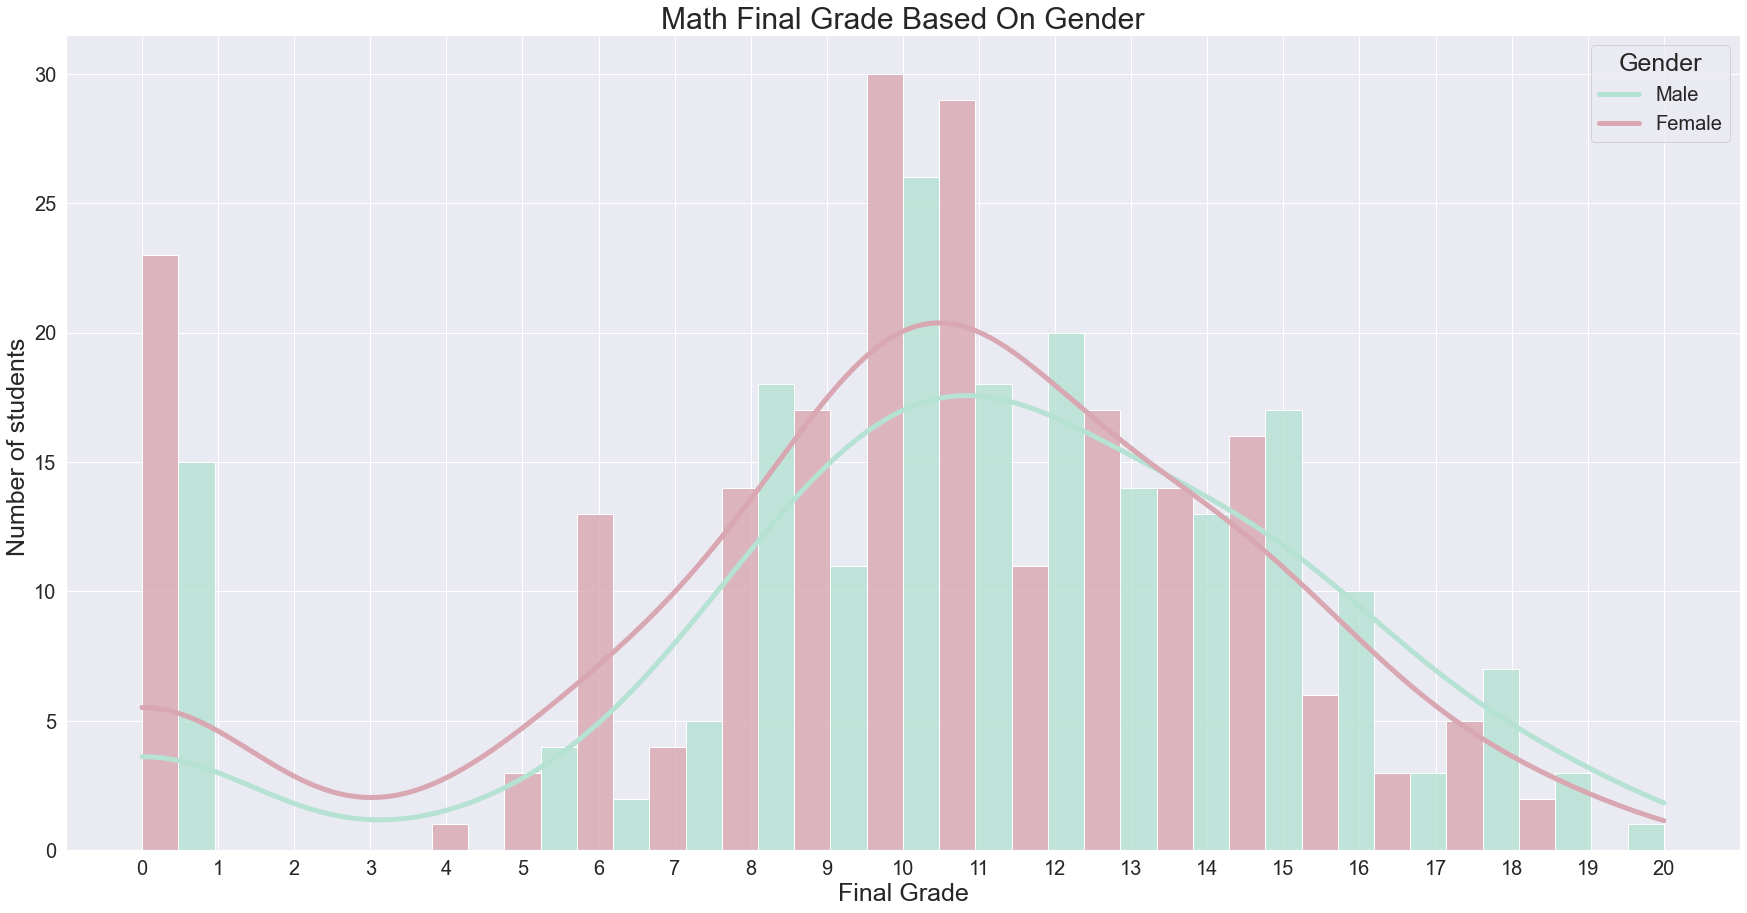

In [11]:
# Histogram plot code 
plt.figure(figsize=(30,15)) # figure size 
palette = ['#D8A7B1','#B6E2D3', '#FAE8E0', '#EF7C8E', '#8FDDE7', '#FBE5C8', '#A49393']
sns.set_palette(palette)  # set color palette
b2 = sns.histplot(
    student_df,                  # data 
    x="G3",                      # Final Grade
    hue="sex",                   # gender 
    multiple="dodge",            # aside  
    alpha=.8,                    # transparency
    bins=21,                     # number of bins
    kde=True,                    # add KDE 
    line_kws={"linewidth":5}     # KDE line width
)
plt.xticks(range(21), fontsize=20) # set xticks
plt.yticks(fontsize=20)            # set xticks
# Naming labels, legend and title 
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'], fontsize = 20, title_fontsize = 25)
plt.title("Math Final Grade Based On Gender", fontsize=30)
plt.xlabel('Final Grade', fontsize=25)
plt.ylabel('Number of students ' , fontsize=25);

### Based on the above plot we can understand the following: ###

- Only one male student succeed in getting a full mark.
- For grades higher than 15 males got higher grading than females.
- Most of the students got grades between 8 and 12.
- Huge number of students got zero for final grades. 
- The dip insight from the previous charts is explained here in more detail, it was caused by no students having a score between 1 and 3. 

In [12]:
grade0 = student_df.loc[student_df['G3' ] == 0]
grade0

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


In [13]:
grade0.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000,38.0
mean,17.078947,2.315789,2.289474,1.605263,1.973684,0.921053,3.842105,3.131579,3.210526,1.342105,1.921053,3.605263,0.0,7.526316,4.657895,0.0
std,1.302421,1.016227,1.112773,0.789782,0.914946,1.075063,1.000711,0.875216,1.318433,0.534047,1.171314,1.284828,0.0,1.811925,3.700083,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,4.000000,0.000000,0.0
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.0,6.000000,0.000000,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.0,7.000000,5.000000,0.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.750000,4.750000,4.000000,4.000000,2.000000,2.000000,5.000000,0.0,9.000000,8.000000,0.0
max,19.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.0,12.000000,10.000000,0.0


In [14]:
grade0.describe(exclude=np.number)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
unique,2,2,2,2,2,5,4,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,yes
freq,34,23,28,31,36,14,21,19,25,37,23,30,21,28,32,30,20


<Figure size 1440x595.44 with 0 Axes>

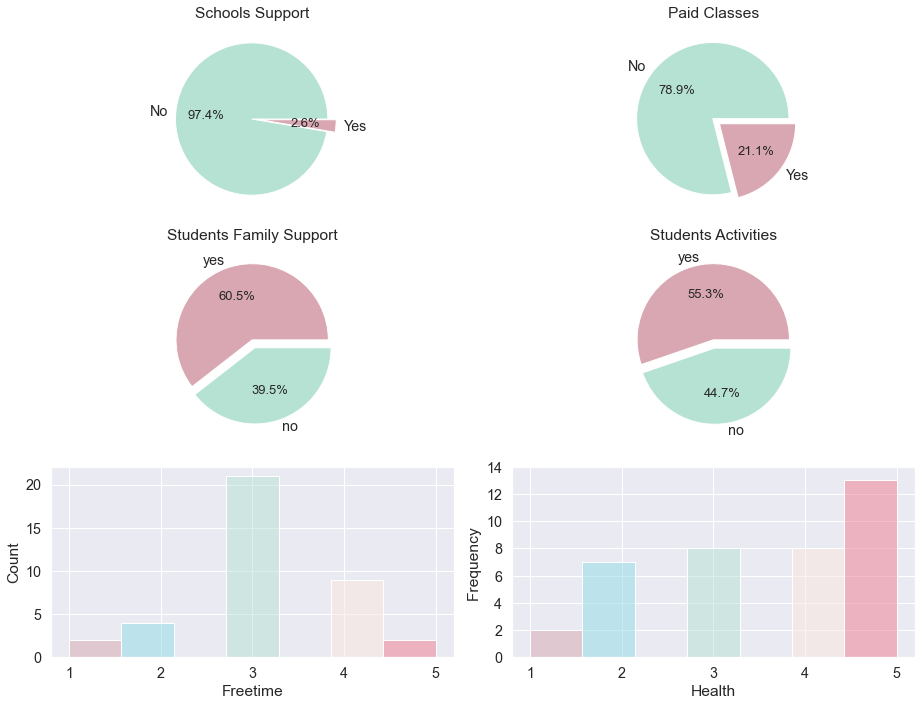

In [15]:
#---------------------------------------------------------------------------------------------------------------#

# Plotting the following 3 variables to explore why some students got zero: schoolsup, paid, health
# Plotting the following 3 variables to help support our claim in suggesting proper solutions: freetime, familysup, activities

#---------------------------------------------------------------------------------------------------------------#

plt.clf() # clear plot data 


plt.figure(figsize=(13,10))

# color dictionary to make the pie slices the same color
colours = {'yes': '#D8A7B1', 'no':'#B6E2D3' }

#---------------------------------------------------------------------------------------------------------------#
# DATA FOR PIE CHARTS: 
# 1) pie chart 1 data: Schools support

schoolSup = grade0["schoolsup"].value_counts()               # slice School support data
schoolSup_list = schoolSup.index.tolist()                    # get the names for the labels from the index

schoolSup_labels = [x.capitalize() for x in schoolSup_list]  # to set labels from index list
schoolSup_values = schoolSup.values                          # to set values from the dataframe

# 2) pie chart 2 data: Paid classes

paid = grade0["paid"].value_counts()                         # slice paid classes data
paid_list = paid.index.tolist()                              # get the names for the labels from the index 

paid_labels = [x.capitalize() for x in paid_list]            # to set labels from index list
paid_values = paid.values                                    # to set values from the dataframe

# 3) pie chart 1 data: Family Support

fam_series = grade0["famsup"].value_counts() # data we need 
fam_labels = fam_series.index # to set labels 
fam_values = fam_series.values # to set a values 

explode = (0.01,0.1)  # to make space between chart elemnts  
sns.set(font_scale = 1.30)        # font size for labels and title
plt.rcParams['font.size'] = 13    # font size for %

# 4) pie chart 2 data: Activities 

act_series = grade0["activities"].value_counts() # data we need 
act_labels = act_series.index # to set labels 
act_values = act_series.values # to set a values 

sns.set(font_scale = 1.30)        # font size for labels and title
plt.rcParams['font.size'] = 13    # font size for %
#---------------------------------------------------------------------------------------------------------------#
# pie chart 1 visual settings: 


explode = (0.01,0.1)              # to make space between chart elemnts  
sns.set(font_scale = 1.30)        # font size for labels and title
plt.rcParams['font.size'] = 13    # font size for %

# Plot the data for pie chart 1

plt.subplot(3, 2, 1) # (upper left)

plt.pie(schoolSup_values, 
        labels = schoolSup_labels, 
        autopct = '%1.1f%%', 
        explode = explode, 
        colors=[colours[key] for key in schoolSup_list]) # loop through color dictionary and set color for labels in list

plt.title("Schools Support")                             # add title 

#---------------------------------------------------------------------------------------------------------------#

# pie chart 2 visual settings: 

explode = (0.01,0.1)              # to make space between chart elemnts  
sns.set(font_scale = 1.30)        # font size for labels and title
plt.rcParams['font.size'] = 13    # font size for %

# Plot the data for pie chart 2

plt.subplot(3, 2, 2) # (upper right)

plt.pie(paid_values, 
        labels = paid_labels, 
        autopct = '%1.1f%%', 
        explode = explode,
        colors=[colours[key] for key in paid_list]) # loop through color dictionary and set color for labels in list

plt.title("Paid Classes")                           # add title

#---------------------------------------------------------------------------------------------------------------#

plt.subplot(3, 2, 3) # (mid left)

plt.pie(fam_values, 
        labels = fam_labels, 
        autopct = '%1.1f%%', 
        explode = explode,
        colors = ['#D8A7B1','#B6E2D3']) 

plt.title("Students Family Support") # add title and change color


#---------------------------------------------------------------------------------------------------------------#

plt.subplot(3, 2, 4) # (mid right)

plt.pie(act_values, 
        labels = act_labels, 
        autopct = '%1.1f%%', 
        explode = explode, 
        colors = ['#D8A7B1','#B6E2D3']
       )

plt.title("Students Activities") # add title and change color to green
#---------------------------------------------------------------------------------------------------------------#
plt.subplot(3, 2, 5) # (lower left)
h1=sns.histplot(x='freetime',
             hue ='freetime', 
             palette =  ['#D8A7B1','#8FDDE7','#B6E2D3', '#FAE8E0', '#EF7C8E'], # to set palette colors
            legend= False,
             data=grade0)

# setting label names and legends
plt.xlabel("Freetime")
plt.xticks(range(1,6)) # set xticks


#---------------------------------------------------------------------------------------------------------------#

plt.subplot(3, 2, 6) # (lower right)
b4 = sns.histplot(
    grade0,
    x="health",        
    hue="health",
    legend= False,
    palette = ['#D8A7B1','#8FDDE7','#B6E2D3', '#FAE8E0', '#EF7C8E']
)

plt.xticks(range(1,6)) # set xticks
plt.yticks(range(0,15,2)) # set yticks
# Naming labels and title 
plt.xlabel('Health')
plt.ylabel('Frequency ');

plt.tight_layout() # To increase space between plots to prevent label overlap
plt.show() # show results



### Based on the above plot we can understand the following: 
1. School Support Pie chart
    * The overwhelming majority of students who got zero on their final grade do not have the Schools support. 
2. Paid Classes Pie chart
    * 80% of the students who got zero on their final grade did not have extra paid classes. 
3. Student Freetime Histogram
    * Most of the students who got zero on their final grade do have sufficient freetime. 
4. Family Support Pie chart
    * 39.5% of the students that got zero on the finales don't have a supportive family. 
5. Extra curricular Activity Pie chart
    * 44.7% of the students that got zero on the finales don't have extra curricular activities. 
6. Student Health Histogram
    * Most of the students lie between 2 and 4, with 4 being the healthiest and 2 being the least healthy. 
    

### Solutions: 
From the freetime histogram chart we can see that the students have an ample amount of freetime to implement these following solutions: 
* Increase the school support for students who scored zero on their exams, more support can include: 
    * More monitoring of the students performance. 
    * An after school program that includes tutoring and one-on-one mentoring to help the students who are behind. To decrease the load on the schools teachers, this can be done by volunteers or people who need extra work experience on their resumes. 
    * Establish a reward system for all students to increase overall performance, this can include coupons, movie tickets, gift cards or sending a survey to the students to see their preferred rewards. 
    * Create a summer school program, where students can take extra classes. 
    * Give extra support to the students who lack family support. 
* Create a paid classes scholarship program for students who scored zero on their exams. 
* Students with health issues could take the exams online, or have a re-take chance. 